## HIDS 506 Project 

## Read data and partial pre-processing

Read data, transpose it and filter samples by selecting female with a single histological subtype and sample subtype since the genetic signature may be different between the different subtypes, and we will try more subtypes when building model. We will handle the missing value when we choose features.

 **Read data** 

In [1]:
import pandas as pd
import numpy as np
# Reading data into a pandas dataframe
data = pd.read_csv('BRCA_gene.csv',header=None)
#show data
data.head()

/Users/chzhang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,2

,0,1,2,3,4,5,6,7,8,9,...,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212
0,participant_id,aaau,aali,aalj,aalk,aaak,aat0,aat1,a9qa,a0sb,...,aaz6,a93s,a7hq,a86g,ab41,ab44,a899,a89a,a8r5,a8r6
1,sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
2,mRNAseq_cluster,1,2,1,3,3,3,4,1,5,...,1,2,4,3,1,2,6,6,3,1
3,bcr_patient_barcode,tcga-3c-aaau,tcga-3c-aali,tcga-3c-aalj,tcga-3c-aalk,tcga-4h-aaak,tcga-5l-aat0,tcga-5l-aat1,tcga-5t-a9qa,tcga-a1-a0sb,...,tcga-ul-aaz6,tcga-uu-a93s,tcga-v7-a7hq,tcga-w8-a86g,tcga-wt-ab41,tcga-wt-ab44,tcga-xx-a899,tcga-xx-a89a,tcga-z7-a8r5,tcga-z7-a8r6
4,bcr_patient_uuid,6e7d5ec6-a469-467c-b748-237353c23416,55262fcb-1b01-4480-b322-36570430c917,427d0648-3f77-4ffc-b52c-89855426d647,c31900a4-5dcd-4022-97ac-638e86e889e4,6623fc5e-00be-4476-967a-cbd55f676ea6,86c6f993-327f-4525-9983-29c55625593a,16fc3677-0393-4ed1-ad3f-c8355f056369,2fd36838-5a83-433e-ac80-b1f77448e5aa,0045349c-69d9-4306-a403-c9c1fa836644,...,4b54e06e-a280-4981-a4e1-9aea154341b4,45013972-2dfd-4f82-a076-e3e4af1b43b8,1285eb55-415c-494a-aa58-936f0427cdd0,90ff48c3-b14b-4a8b-94a1-98c0bab0d27b,e7db08a7-b439-4230-8dc4-1b54af4736c4,5cd79093-1571-4f71-8136-0d84ccabdcac,f89588e9-ca73-4465-a7fb-7246edb45e3a,ca20249f-b7ea-4fd9-9ecb-34f74755ae35,23f438bd-1dbb-4d46-972f-1e8e74ddbd37,b1d44c81-747d-471f-9093-aeb262a17975


 **Transpose data** 

In [2]:
#transpose
data=data.T
#set column names
data.columns=data.iloc[0,:]
data=data.iloc[1:,:]
#show data
data.head()

,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,additional_surgery_locoregional_procedure,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
1,aaau,Primary solid Tumor,1,tcga-3c-aaau,6e7d5ec6-a469-467c-b748-237353c23416,alive,NaN,4047,NaN,NaN,...,9.9,7,10,10.7,8,10.2,11.8,10.9,10.2,0.8
2,aali,Primary solid Tumor,2,tcga-3c-aali,55262fcb-1b01-4480-b322-36570430c917,alive,NaN,4005,NaN,NaN,...,9.9,5.9,8.8,10.4,7.6,9.2,12.4,10.4,8.7,9.9
3,aalj,Primary solid Tumor,1,tcga-3c-aalj,427d0648-3f77-4ffc-b52c-89855426d647,alive,NaN,1474,NaN,NaN,...,11.3,5.1,9.1,9.6,8.4,9.1,12.4,9.9,9,5.1
4,aalk,Primary solid Tumor,3,tcga-3c-aalk,c31900a4-5dcd-4022-97ac-638e86e889e4,alive,NaN,1448,NaN,NaN,...,9.4,5.8,8.8,9.8,7.5,9.2,12.5,9.6,9.5,6.1
5,aaak,Primary solid Tumor,3,tcga-4h-aaak,6623fc5e-00be-4476-967a-cbd55f676ea6,alive,NaN,348,NaN,NaN,...,9.4,5.6,8.7,10,3.8,9.6,12,9.7,9.8,7.5


**Filter samples**

In [3]:
#check the distribution of gender,histological_type and sample type
print(data.gender.value_counts(),"\n")
print(data.histological_type.value_counts(),"\n")
print(data.sample_type.value_counts(),"\n")

female    1199
male        13
Name: gender, dtype: int64 

infiltrating ductal carcinoma       879
infiltrating lobular carcinoma      210
other, specify                       47
mixed histology (please specify)     39
mucinous carcinoma                   18
metaplastic carcinoma                 9
medullary carcinoma                   8
infiltrating carcinoma nos            1
Name: histological_type, dtype: int64 

Primary solid Tumor    1093
Solid Tissue Normal     112
Metastatic                7
Name: sample_type, dtype: int64 



In [4]:
#filter samples to female with the most frequent histological subtype and sample subtype
data_subtype=data[(data['histological_type']=='infiltrating ductal carcinoma')
                  & (data['sample_type']=='Primary solid Tumor') 
                  & (data['gender']=='female')]
data_subtype=data_subtype.reset_index(drop=True)

## Assign a label to each example of the dataset 

We’ve divided the stages of breast cancer (The cancer stage grouping system, rather than the TMN system) in two labeled groups: 
1.	Localized/Early stages (stage I and II) with value 0, when cancer cells have not yet spread to other parts of the body with few lymph nodes involved. Tumors mostly less than 50mm. 
2.	Spread/Late stages (stage III and IV) with value 1, in which stages cancer has spread through lymph nodes to other areas, metastasis occurs. Tumors larger than 50mm.

“Stage X”s are assumed as non-defined value, and have been deleted.


In [5]:
#check distribution of pathologic stage
data_subtype.pathologic_stage.value_counts()

stage iia     263
stage iib     180
stage iiia    107
stage i        69
stage ia       65
stage iiic     29
stage iiib     19
stage iv       16
stage x         9
stage ib        5
stage ii        3
Name: pathologic_stage, dtype: int64

In [6]:
#assign a label
data_subtype["label"]=[0 if i in ['stage i','stage ia','stage ib','stage ii','stage iia','stage iib'] 
                    else 1 for i in data_subtype.pathologic_stage]

In [7]:
#check the distribution of label
data_subtype.label.value_counts()

0    585
1    186
Name: label, dtype: int64

The label is a little unbalanced, so we will do oversampling to early stages samples in training set and do undersampling to late stages samples in training set when we build the models.

## Generate you processed feature vector for each example 

**Gene features** 

We dropped the gene columns containing more than 10% NA, and filled the other NA with respective mean. We then screened out the top 1000 genes that show the most variability in expression levels (largest variance in values), and 7 additional genes that are widely proved to have strong impact on breast cancer biologically, though those are not within the top 100 variant genes. The 7 genes selected include MYC as the most frequent CNA cancer gene (Generate from BRC data of TCGA, Firehose Legacy, PanCancer Atlas), PIK3CA and TP53 as the most frequent mutated cancer genes (Generate from BRC data of TCGA, Firehose Legacy, PanCancer Atlas), BRCA1, BRCA2, CDH1, PTEN as highly to moderately penetrant mutations of genes (Walsh, Michael F., et al., 2016), also frequently used as breast cancer biomarkers (National Comprehensive Cancer Network, Inc., 2018).
We will test 20 vs. 50 vs. 100 most variant genes, plus with vs. without 7 additional genes as input of the model to compare and investigate.

In [8]:
#find gene columns
genes=data_subtype.iloc[:,134:]
#pre processing
genes=genes.astype(float)
#droped the genes columns which have more than 10% NA
genes=genes.iloc[:,list(genes.isna().sum()<len(genes)/10)]#    
# #fill NA with mean value
# genes=genes.fillna(genes.mean())
# #show genes
# genes.head()
for i in genes.columns[list(genes.isna().sum()>0)]:
    genes[i]=genes[i].fillna((genes[i].mean()))


In [9]:
#标准化后再比较方差?
#calculate variance of genes
var=dict(zip(genes.var().index,genes.var()))
#sort genes by variance
var_sort=sorted(var.items(), key=lambda d: d[1],reverse=True)
#find top 1000 genes
var_100=[i for i,j in var_sort[0:1000]]
#7 additional genes
genes_7=["MYC","PIK3CA","TP53","BRCA1","BRCA2","CDH1","PTEN"]
#check if the additional genes in top 100 genes
print(len(set(genes_7)&set(var_100)))
#select 107 genes
temp=genes[var_100+genes_7]
#show selected genes
temp.head()

0


,CPB1,SCGB2A2,GSTM1,CYP2B7P1,SCGB1D2,PRAME,DHRS2,PIP,TFF1,MUCL1,...,PKHD1,CNTN4,MSX2,MYC,PIK3CA,TP53,BRCA1,BRCA2,CDH1,PTEN
0,4.2,16.200000,6.5,2.4,10.5,9.300000,5.1,8.400000,7.5,7.3,...,1.7,5.4,7.1,7.5,8.3,8.7,8.6,7.3,13.8,10.1
1,11.1,9.074297,2.7,9.9,-0.1,5.266529,14.5,8.230769,7.8,11.4,...,3.2,5.6,9.1,10.2,7.8,10.3,7.6,7.2,13.1,10.5
2,6.9,8.700000,11.6,9.2,6.5,0.300000,12.7,11.600000,13.6,12.1,...,2.5,7.8,9.2,10.5,8.3,10.5,7.2,6.7,13.3,10.9
3,18.6,10.100000,1.0,10.4,7.6,1.000000,6.3,11.900000,12.6,13.7,...,3.8,7.4,8.3,11.1,9.4,10.3,8.1,6.6,13.7,10.9
4,6.6,14.100000,10.5,8.8,10.6,9.400000,8.4,10.300000,13.2,6.6,...,5.0,6.3,9.6,10.8,8.9,10.8,8.1,6.6,14.0,11.2


In [10]:
#find high correlation
remove=[]
corr=temp.corr()
corr_high=abs(corr)>0.6 #8
for i in corr_high.columns:
    for j in corr_high.columns:
        if (corr_high[i][j]==True) & (i!=j):
#             print(i,j)
            if j not in remove:
                remove.append(i)

In [11]:
#delete the genes has high correlation
genes=temp.drop(remove,axis=1)

## clinical features

In [12]:
clinical=data_subtype.loc[:,['age_at_initial_pathologic_diagnosis','race']]
clinical.age_at_initial_pathologic_diagnosis=clinical.age_at_initial_pathologic_diagnosis.astype(float)

for i in clinical.columns.drop('age_at_initial_pathologic_diagnosis'):
    print(data_subtype.groupby([i,'label']).count().iloc[:,1])

race                              label
american indian or alaska native  1          1
asian                             0         37
                                  1         10
black or african american         0        114
                                  1         36
white                             0        386
                                  1        110
Name: sample_type, dtype: int64


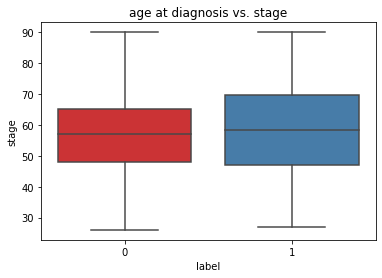

In [15]:
data_subtype.age_at_initial_pathologic_diagnosis=data_subtype.age_at_initial_pathologic_diagnosis.astype(float)
import matplotlib.pyplot as plt
import seaborn as sns
boxplot=sns.boxplot(x='label', y='age_at_initial_pathologic_diagnosis', data=data_subtype, palette="Set1")
boxplot.set_title("age at diagnosis vs. stage")
boxplot.set_ylabel('stage')
plt.show()#0 means early stage, 1 means late


## Generate processed dataset of features and labels

In [16]:
final_data=genes
final_data['label']=data_subtype.label

##  Modeling

## import packages and import functions for modeling

In [17]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt

from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score, roc_auc_score, precision_score, recall_score,roc_curve, precision_recall_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [30]:
#function to get metrics
def get_metrics(model_name, y_true_fold, y_pred_fold, y_pred_proba=None):    
    cv_scores = []  
    cm = confusion_matrix(y_true_fold,y_pred_fold)
    precision = precision_score(y_true_fold, y_pred_fold)
    recall = recall_score(y_true_fold, y_pred_fold)
    sensitivity = recall_score(y_true_fold, y_pred_fold)
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])  
    f1 = f1_score(y_true_fold, y_pred_fold)  
    accuracy = accuracy_score(y_true_fold, y_pred_fold)

    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_true_fold, y_pred_proba)
        pr, rec, thresholds = precision_recall_curve(y_true_fold, y_pred_fold)
        AUPRC = auc(pr, rec) 
    if y_pred_proba is None:
        roc_auc = -1
        AUPRC = -1

    cv_scores.append([model_name, precision, recall, specificity, sensitivity, f1, roc_auc,accuracy])    
    results_df = pd.DataFrame(cv_scores, columns=['model_name', 'precision', 'recall', 'specificity', 'sensitivity', 'f1', 'auroc','accuracy'])

    return results_df

#Function to plot ROC Curve
def plot_roc(testy, predictions, title):
    fpr, tpr, thresholds = roc_curve(testy, predictions)
    roc_auc = auc(fpr, tpr)  
    print('AUROC: %.3f' % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

#Function to plot PR Curve
def plot_prc(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    auc_score = auc(recall, precision)    
    plt.plot(recall,precision, label='PR curve (area = %0.2f)' % auc_score)
    pyplot.plot([0, 1], [0.5, 0.5], linestyle='--' )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])    
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()    
    
#Function to plot PR vs thresholds
def plot_prec_recall_vs_thresh(testy, predictions, title):
    precision, recall, thresholds = precision_recall_curve(testy, predictions)
    plt.plot(thresholds, precision[:-1], 'b--', label='precision')
    plt.plot(thresholds, recall[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')    
    plt.ylim([0,1])
    plt.legend(loc="lower right")
    plt.title(title)
    plt.show()
    
#Function to get prediction value    
def get_predictions(predictions_proba, threshold=0.5):
    predictions = np.where(predictions_proba <= threshold, 0, 1)
    return predictions


#firstly oversampling the ratio to 0.6:1, then undersampling majority class to 0.8:1
#, combine two methods to aviod over-fitting or missing too much information
def resample(trainx, trainy):
    over = SMOTE(sampling_strategy=0.5)
    under = RandomUnderSampler(sampling_strategy=0.8)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps)
    trainx, trainy = pipeline.fit_resample(trainx, trainy) 
    return trainx,trainy


def get_train_test_resample(data):
    x, y = data.iloc[:,:-1],data.iloc[:,-1]                                                                                                                                                                                                                                                                                                                                                                                              
    trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2)
    trainx,trainy = resample(trainx, trainy)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          x,y = resample(x,y)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ;                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(trainx)
    # Now apply the transformations to the data:
    trainx = scaler.transform(trainx)
    testx = scaler.transform(testx)                    
    return trainx, testx, trainy, testy

## Prepare for classification models

In [31]:
data = final_data
#show data
data.head()
#the features include top 1000 genes which have the largest variance and 7 genes known to associate with breast cancer progression,
#exclude high correlated genes as HW1 did

,CPB1,GSTM1,PRAME,DHRS2,PIP,MUCL1,SLC30A8,COL2A1,TFAP2B,CALML5,...,CNTN4,MSX2,MYC,PIK3CA,TP53,BRCA1,BRCA2,CDH1,PTEN,label
0,4.2,6.5,9.300000,5.1,8.400000,7.3,0.1,1.4,12.000000,9.6,...,5.4,7.1,7.5,8.3,8.7,8.6,7.3,13.8,10.1,0
1,11.1,2.7,5.266529,14.5,8.230769,11.4,3.8,9.4,7.128054,6.8,...,5.6,9.1,10.2,7.8,10.3,7.6,7.2,13.1,10.5,0
2,6.9,11.6,0.300000,12.7,11.600000,12.1,2.6,3.5,11.100000,11.6,...,7.8,9.2,10.5,8.3,10.5,7.2,6.7,13.3,10.9,0
3,18.6,1.0,1.000000,6.3,11.900000,13.7,8.4,9.4,9.600000,6.4,...,7.4,8.3,11.1,9.4,10.3,8.1,6.6,13.7,10.9,0
4,6.6,10.5,9.400000,8.4,10.300000,6.6,8.8,7.1,11.700000,5.1,...,6.3,9.6,10.8,8.9,10.8,8.1,6.6,14.0,11.2,0


In [32]:
def modeling(trainx,trainy,testx,testy):
    models = []
    models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
    models.append(('RF', RandomForestClassifier(n_estimators=500)))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier(hidden_layer_sizes=(5,5,5))))
    models.append(('SVM', svm.SVC(kernel = 'sigmoid',probability=True)))

    # Evaluate each model
    model_results = pd.DataFrame()

    for name, model in models:    
        print('Fitting',name)
        model.fit(trainx, trainy)
        predictions_proba = model.predict_proba(testx)[:,1]
        predictions = get_predictions(predictions_proba,0.5)    
        metrics = get_metrics(name, testy, predictions, predictions_proba)
    #     plot_prec_recall_vs_thresh(testy, predictions_proba,'Precision-Recall vs Tresholds Curve')
        model_results = pd.concat([model_results, metrics], axis=0)     
    return model_results

## Fit classification models with  adjusting variables and compare the metrics

In [149]:
#all of 1007 genes
data = final_data
trainx, testx, trainy, testy = get_train_test_resample(data)
model_results=modeling(trainx,trainy,testx,testy)
model_results

Fitting LR
Fitting RF
Fitting NB
Fitting MLP


/Users/chzhang/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fitting SVM


,model_name,precision,recall,specificity,sensitivity,f1,auroc,accuracy
0,LR,0.616438,0.789474,0.626667,0.789474,0.692308,0.781520,0.696970
0,RF,0.853659,0.614035,0.920000,0.614035,0.714286,0.856725,0.787879
0,NB,0.518987,0.719298,0.493333,0.719298,0.602941,0.683509,0.590909
0,MLP,0.704918,0.754386,0.760000,0.754386,0.728814,0.795322,0.757576
0,SVM,0.648148,0.614035,0.746667,0.614035,0.630631,0.718363,0.689394


In [227]:
#not consider the 7 genes known to associate with breast cancer progression.
data = final_data
genes_7=["MYC","PIK3CA","TP53","BRCA1","BRCA2","CDH1","PTEN"]
data7=data.drop(genes_7,axis=1)
trainx, testx, trainy, testy = get_train_test_resample(data7)
model_results=modeling(trainx,trainy,testx,testy)
model_results

Fitting LR
Fitting RF
Fitting NB
Fitting MLP


/Users/chzhang/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fitting SVM


,model_name,precision,recall,specificity,sensitivity,f1,auroc,accuracy
0,LR,0.597015,0.714286,0.644737,0.714286,0.650407,0.749765,0.674242
0,RF,0.767442,0.589286,0.868421,0.589286,0.666667,0.756109,0.750000
0,NB,0.486486,0.642857,0.500000,0.642857,0.553846,0.606086,0.560606
0,MLP,0.575342,0.750000,0.592105,0.750000,0.651163,0.741776,0.659091
0,SVM,0.625000,0.625000,0.723684,0.625000,0.625000,0.699366,0.681818


In [201]:
#just consider top100 genes known to associate with breast cancer progression.
data = final_data
label=data.label
data=pd.concat([data.iloc[:,:100],data.loc[:,genes_7]], axis=1)
data['label']=label
data107=data
trainx, testx, trainy, testy = get_train_test_resample(data107)
model_results=modeling(trainx,trainy,testx,testy)
model_results

Fitting LR
Fitting RF
Fitting NB
Fitting MLP
Fitting SVM


/Users/chzhang/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,model_name,precision,recall,specificity,sensitivity,f1,auroc,accuracy
0,LR,0.642857,0.590164,0.718310,0.590164,0.615385,0.706073,0.659091
0,RF,0.795918,0.639344,0.859155,0.639344,0.709091,0.846340,0.757576
0,NB,0.650000,0.639344,0.704225,0.639344,0.644628,0.729393,0.674242
0,MLP,0.685185,0.606557,0.760563,0.606557,0.643478,0.750981,0.689394
0,SVM,0.666667,0.295082,0.873239,0.295082,0.409091,0.662434,0.606061


In [166]:
#just consider top50 genes known to associate with breast cancer progression.
data = final_data
label=data.label
data=pd.concat([data.iloc[:,:50],data.loc[:,genes_7]], axis=1)
data['label']=label
data57=data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ;data107=final_data
trainx, testx, trainy, testy = get_train_test_resample(data57)
model_results=modeling(trainx,trainy,testx,testy)
model_results

Fitting LR
Fitting RF
Fitting NB
Fitting MLP
Fitting SVM


/Users/chzhang/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,model_name,precision,recall,specificity,sensitivity,f1,auroc,accuracy
0,LR,0.609756,0.438596,0.786667,0.438596,0.510204,0.662456,0.636364
0,RF,0.727273,0.561404,0.840000,0.561404,0.633663,0.753216,0.719697
0,NB,0.521739,0.631579,0.560000,0.631579,0.571429,0.620351,0.590909
0,MLP,0.547619,0.403509,0.746667,0.403509,0.464646,0.651696,0.598485
0,SVM,0.454545,0.175439,0.840000,0.175439,0.253165,0.585848,0.553030


##### The random  forest model using 100 genes has the largest variance and 7 genes known to associate with breast cancer progression is the best. 

## Optimize the Random Forest model by adjusting parameters and variables

In [333]:
for k in ([10,50,100,500]):
    data = data107
    trainx, testx, trainy, testy = get_train_test_resample(data)
    model=RandomForestClassifier(n_estimators=k)
    model.fit(trainx, trainy)
    predictions_proba = model.predict_proba(testx)[:,1]
    predictions = get_predictions(predictions_proba,0.5)    
    metrics = get_metrics(k, testy, predictions, predictions_proba)
    print(metrics)

   model_name  precision   recall  specificity  sensitivity        f1  \
0          10   0.772727  0.71831     0.871795      0.71831  0.744526   

      auroc    auprc  accuracy confusion_matrix (tn fp fn tp)  
0  0.859095  0.42105   0.81383              [102, 15, 20, 51]  
   model_name  precision    recall  specificity  sensitivity        f1  \
0          50   0.753846  0.690141     0.863248     0.690141  0.720588   

      auroc     auprc  accuracy confusion_matrix (tn fp fn tp)  
0  0.845432  0.402845  0.797872              [101, 16, 22, 49]  
   model_name  precision    recall  specificity  sensitivity        f1  \
0         100   0.768116  0.746479     0.863248     0.746479  0.757143   

      auroc    auprc  accuracy confusion_matrix (tn fp fn tp)  
0  0.869447  0.42751  0.819149              [101, 16, 18, 53]  
   model_name  precision    recall  specificity  sensitivity        f1  \
0         500   0.724638  0.704225     0.837607     0.704225  0.714286   

      auroc     aupr

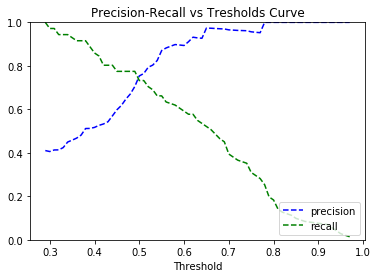

the threshold that will balance precision and recall is 0.5


In [250]:
#check the best threshold to balance the pr
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainx,trainy)
rfpre = rf.predict_proba(testx)[:,1]
plot_prec_recall_vs_thresh(testy,rfpre,'Precision-Recall vs Tresholds Curve')
print("the threshold that will balance precision and recall is 0.5")

##### The best threshold is 0.5 and the best n_estimator is 100.

## Evaluate the performance of final model

In [233]:
data = data107
trainx, testx, trainy, testy = get_train_test_resample(data)
model=RandomForestClassifier(n_estimators=100)
model.fit(trainx, trainy)
predictions_proba = model.predict_proba(testx)[:,1]
predictions = get_predictions(predictions_proba,0.5)    
metrics = get_metrics('RF', testy, predictions, predictions_proba)
#     plot_prec_recall_vs_thresh(testy, predictions_proba,'Precision-Recall vs Tresholds Curve')
metrics

,model_name,precision,recall,specificity,sensitivity,f1,auroc,accuracy
0,RF,0.807692,0.7,0.861111,0.7,0.75,0.839699,0.787879


AUROC: 0.849


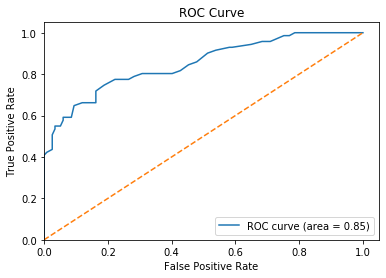

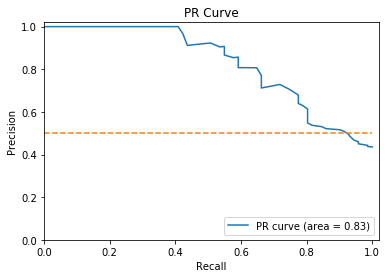

In [288]:
#plot ROC curve
plot_roc(testy,predictions_proba, "ROC Curve")
#plot Precision/Recall curve
plot_prc(testy,predictions_proba, "PR Curve")

## Find the most important genes

In [295]:
x= data.iloc[:,:-1]
importance=dict(zip(x.columns,model.feature_importances_)) #输出特征importance
importance=dict(sorted(importance.items(),key=lambda k:k[1],reverse=True))
#list top 50 of the most important features
important=list(importance.keys())[:50]
important

['SLC30A8',
 'SLC9A2',
 'CNTNAP2',
 'PIP',
 'ABCA12',
 'GRB14',
 'MUC6',
 'LRP2',
 'LPPR3',
 'GSTM1',
 'COL2A1',
 'RPS28',
 'PPP2R2C',
 'TAT',
 'FAM3B',
 'ONECUT2',
 'CLCA2',
 'DHRS2',
 'LOC728606',
 'AQP5',
 'BRCA1',
 'DKK1',
 'IL20',
 'HS6ST3',
 'SYT1',
 'CEACAM6',
 'ATRNL1',
 'CDH1',
 'TP53',
 'PRAME',
 'C16orf89',
 'GLDC',
 'TFAP2B',
 'CRISP3',
 'SORCS1',
 'CLIC6',
 'NBPF4',
 'BRCA2',
 'FOLR1',
 'MUC15',
 'SLC6A4',
 'MSMB',
 'FOXI1',
 'TMPRSS4',
 'BMPR1B',
 'TFF1',
 'TNNT1',
 'CBLN2',
 'PON3',
 'AKR1B10']

In [296]:
# there are 4 genes in seven genes known to associate with breast cancer progression happend in important gene list
important_7=set(genes_7)&set(important)

{'BRCA1', 'BRCA2', 'CDH1', 'TP53'}

Conclusion: 

The model could be used to help doctor to predict the advanced breast cancer even the performance is not very high. Besides, through the model, we find top 50 genes showing most importance to the model, we then link them with different pathways ,and map them with “hot”  genes from biomedical findings which may be proved to have significant influence in breast cancer development, some genes may affect breast cancer and we explained in presentation